In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('exam_data.csv')
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,absences.Math,G1.Math,G2.Math,G3.Math,failures.Port,paid.Port,absences.Port,G1.Port,G2.Port,G3.Port
0,147.0,GP,F,18,R,GT3,T,3,1,other,...,16,9,8,7,0,no,4,8,8,8
1,118.0,GP,F,17,U,GT3,T,2,4,services,...,0,16,17,17,0,no,0,17,18,17
2,130.0,GP,F,17,U,GT3,T,4,4,other,...,0,11,11,12,0,no,0,13,13,13
3,240.0,GP,M,16,U,GT3,T,3,3,services,...,2,12,13,12,0,no,0,11,12,13
4,9.0,GP,F,15,R,LE3,T,3,1,other,...,12,16,16,16,0,no,6,15,15,15


In [18]:
df.shape

(504, 40)

In [19]:
# Check for missing values
print(df.isnull().sum())
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

Unnamed: 0       0
school           0
sex              0
age              0
address          0
famsize          0
Pstatus          0
Medu             0
Fedu             0
Mjob             0
Fjob             0
reason           0
guardian         0
traveltime       0
studytime        0
schoolsup        0
famsup           0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
Dalc             0
Walc             0
health           0
failures.Math    0
paid.Math        0
absences.Math    0
G1.Math          0
G2.Math          0
G3.Math          0
failures.Port    0
paid.Port        0
absences.Port    0
G1.Port          0
G2.Port          0
G3.Port          0
dtype: int64

Missing Values:
Series([], dtype: int64)


          G1.Math       goout        Dalc
count  504.000000  504.000000  504.000000
mean    10.811508    3.067460    1.424603
std      3.318451    1.133009    0.791524
min      4.000000    1.000000    1.000000
25%      8.000000    2.000000    1.000000
50%     10.000000    3.000000    1.000000
75%     13.000000    4.000000    2.000000
max     19.000000    5.000000    5.000000


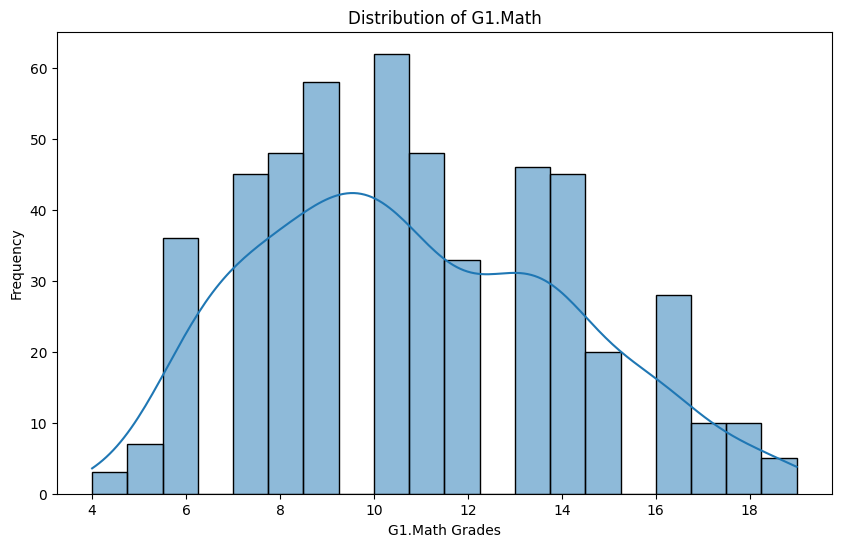

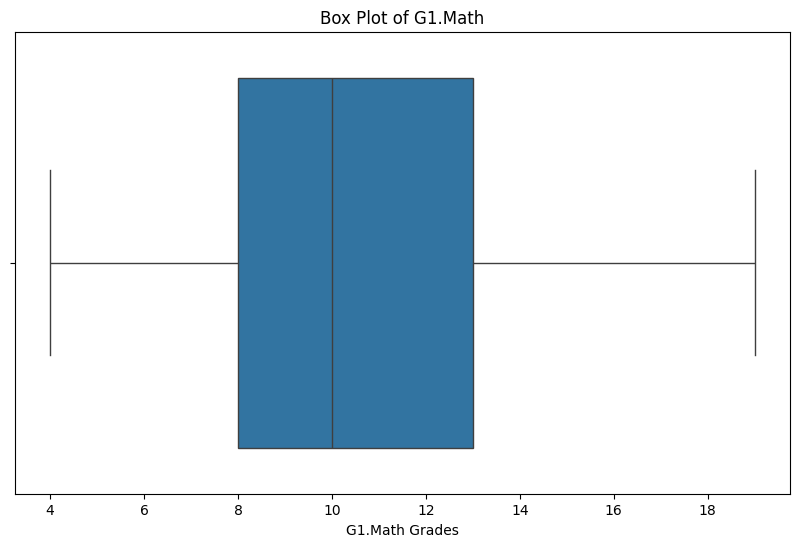

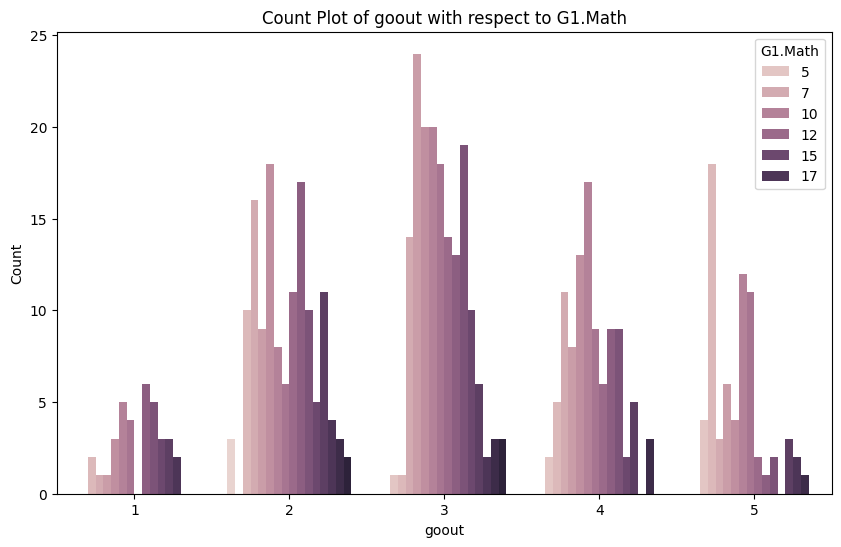

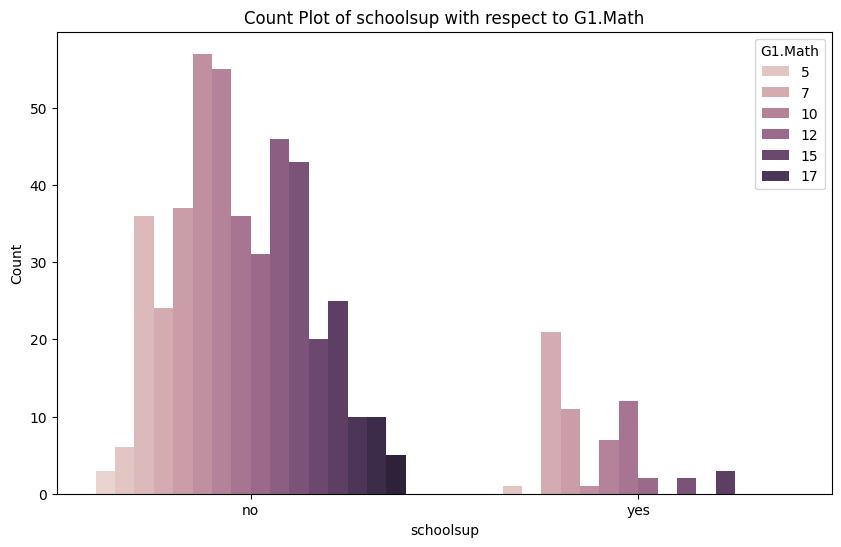

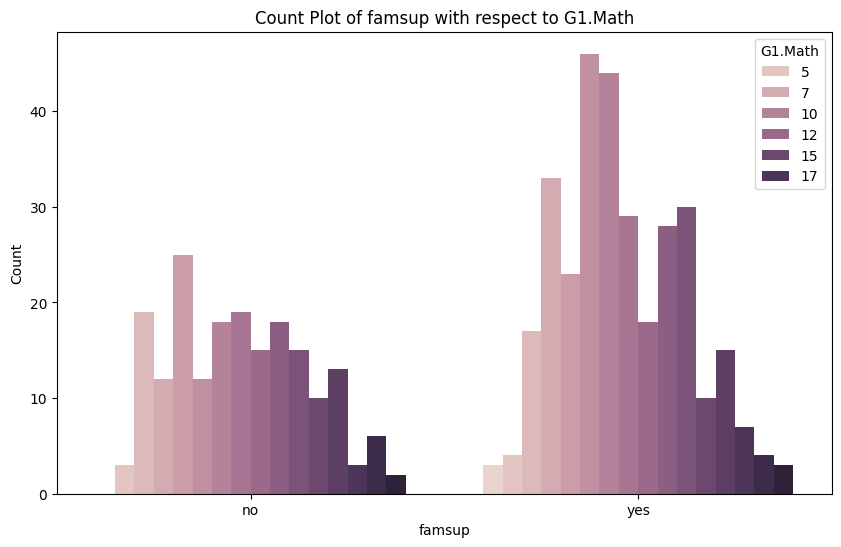

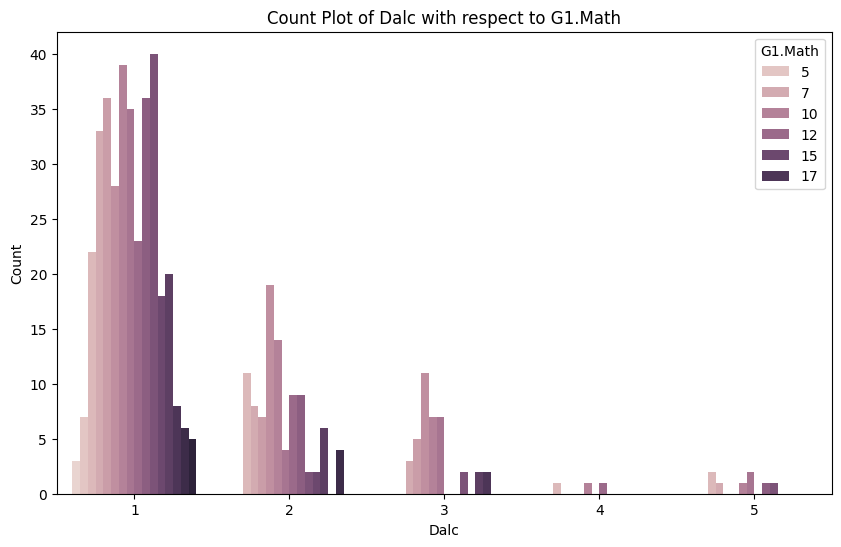

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the data into a DataFrame named df
# If not, you should load the data using pd.read_csv or other methods

# Select relevant columns for analysis
selected_columns = ['G1.Math', 'goout', 'schoolsup', 'famsup', 'Dalc']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Descriptive Statistics
print(df_selected.describe())

# Histogram of G1.Math
plt.figure(figsize=(10, 6))
sns.histplot(df_selected['G1.Math'], bins=20, kde=True)
plt.title('Distribution of G1.Math')
plt.xlabel('G1.Math Grades')
plt.ylabel('Frequency')
plt.show()

# Box Plot of G1.Math
plt.figure(figsize=(10, 6))
sns.boxplot(x='G1.Math', data=df_selected)
plt.title('Box Plot of G1.Math')
plt.xlabel('G1.Math Grades')
plt.show()

# Categorical Analysis using 'goout', 'schoolsup', 'famsup', 'Dalc'
categorical_columns = ['goout', 'schoolsup', 'famsup', 'Dalc']

for column in categorical_columns:
    # Bar Plot for each category
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_selected, hue='G1.Math')
    plt.title(f'Count Plot of {column} with respect to G1.Math')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

The project aims to understand the factors influencing success in Mathematics and Portuguese subjects based on student achievement data from two Portuguese schools. The analysis will involve predictive modeling and classification tasks, focusing on key features such as goout, schoolsup, famsup, Dalc, and excluding Medu.

Students who reported higher levels of going out with friends tended to have a wider range of average grades. There is a noticeable decrease in the frequency of higher grades for students with very low and very high scores in the "going out" category.it is the most important feature out of all of them. This shows that predicting a student's G1.Math grades is significantly influenced by their outing habits. More students, according to our graph, do not receive additional academic support. Our findings indicate that additional educational support has no discernible effect on our grading to G1.Math, nor does it make a difference. Additionally, it shows that more students are not receiving extra school support. Our analysis shows that more students have family support. The availability of family educational support (famsup) appears to have a positive impact on the distribution of grades. Students with family support exhibit a higher frequency of above-average grades Our graph demonstrates how drinking alcohol during the workday lowers student performance. According to our graph, students either do not drink alcohol at all or consume less during the workday.The amount of alcohol consumed by students during the workday also plays a significant role in predicting G1.Math grades, but not to the same extent as the "goout" factor.

# Task 1


In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = "exam_data.csv"
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ['goout', 'schoolsup', 'famsup', 'Dalc']
target = 'G1.Math'

# Exclude 'Medu' from the features
features = [feature for feature in features if feature != 'Medu']

# Select categorical features for one-hot encoding
categorical_features = ['schoolsup', 'famsup']

# Create feature matrix (X) and target variable (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical features with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Build the predictive model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can also print feature importances to see the contribution of each feature
feature_importances = model.feature_importances_
for feature, importance in zip(preprocessor.get_feature_names_out(features), feature_importances):
    print(f"{feature}: {importance}")

Mean Squared Error: 13.086348689992011
cat__schoolsup_no: 0.0646501229392471
cat__schoolsup_yes: 0.07112340431056623
cat__famsup_no: 0.08575968295199768
cat__famsup_yes: 0.09005269511816401
remainder__goout: 0.414000665661699
remainder__Dalc: 0.2744134290183261


The analysis involves predictive modeling and classification tasks, focusing on key features such as goout, schoolsup, famsup, Dalc, and excluding Medu. Mean Squared Error: 13.086348689992011 This suggests that, on average, the squared difference between the predicted and actual G1.math grades on the test set is 13.086.

**schoolsup_no**: 0.0646501229392471 The importance of this feature is 0.0647. It suggests that whether or not a student receives extra educational support (schoolsup) has a modest impact on predicting the G1.math grades. A smaller contribution to the model's overall predictive power is indicated by a lower importance value.

**schoolsup_yes**: 0.07112340431056623 The significance of this feature is 0.0711. Like the 'no' category, the 'yes' category of school support also makes little contribution to the model's predictive ability.

**famsup_no**: 0.08575968295199768 A value of 0.0858 is assigned to this feature. Family support may have a comparatively greater influence on predicting G1.Math grades than school support, as evidenced by the slightly higher importance of family educational support (famsup) compared to school support.

**famsup_yes**: 0.09005269511816401 The significance of this feature is 0.0901. Similar to the 'no' category, the 'yes' category of family support also has a slightly higher importance, indicating its contribution to the model. remainder__goout: 0.414000665661699 The variable "goout" is represented by this feature. At 0.4140, it is the most important feature out of all of them. This shows that predicting a student's G1.Math grades is significantly influenced by their outing habits. A greater significance score suggests that this variable is essential to the model's predictions.

**remainder__Dalc**: 0.2744134290183261 This feature represents the 'Dalc' variable. It has an importance of 0.2744. The amount of alcohol consumed by students during the workday also plays a significant role in predicting G1.Math grades, but not to the same extent as the "goout" factor.

## TASK2 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('exam_data.csv')
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,absences.Math,G1.Math,G2.Math,G3.Math,failures.Port,paid.Port,absences.Port,G1.Port,G2.Port,G3.Port
0,147.0,GP,F,18,R,GT3,T,3,1,other,...,16,9,8,7,0,no,4,8,8,8
1,118.0,GP,F,17,U,GT3,T,2,4,services,...,0,16,17,17,0,no,0,17,18,17
2,130.0,GP,F,17,U,GT3,T,4,4,other,...,0,11,11,12,0,no,0,13,13,13
3,240.0,GP,M,16,U,GT3,T,3,3,services,...,2,12,13,12,0,no,0,11,12,13
4,9.0,GP,F,15,R,LE3,T,3,1,other,...,12,16,16,16,0,no,6,15,15,15


In [2]:
# Data Preprocessing

# Selecting the relevant features for Task 2
features_task2 = ['goout', 'schoolsup', 'famsup', 'Dalc', 'G1.Math']
data_task2 = df[features_task2]

# Checking for missing values
missing_values_task2 = data_task2.isnull().sum()

# Binning the 'G1.Math' into 4 categories
data_task2['G1.Math.Binned'] = pd.qcut(data_task2['G1.Math'], 4, labels=False)

# Display the binned categories and check missing values
binned_counts = data_task2['G1.Math.Binned'].value_counts()


C:\Users\hahir\AppData\Local\Temp\ipykernel_28336\591347298.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task2['G1.Math.Binned'] = pd.qcut(data_task2['G1.Math'], 4, labels=False)


In [3]:
missing_values_task2

goout        0
schoolsup    0
famsup       0
Dalc         0
G1.Math      0
dtype: int64

No missing values were found 

In [4]:
binned_counts

G1.Math.Binned
0    139
2    127
1    120
3    118
Name: count, dtype: int64

In [5]:
data_task2.head()

,goout,schoolsup,famsup,Dalc,G1.Math,G1.Math.Binned
0,3,no,no,1,9,1
1,2,no,yes,2,16,3
2,1,yes,yes,1,11,2
3,3,no,no,1,12,2
4,2,no,yes,2,16,3


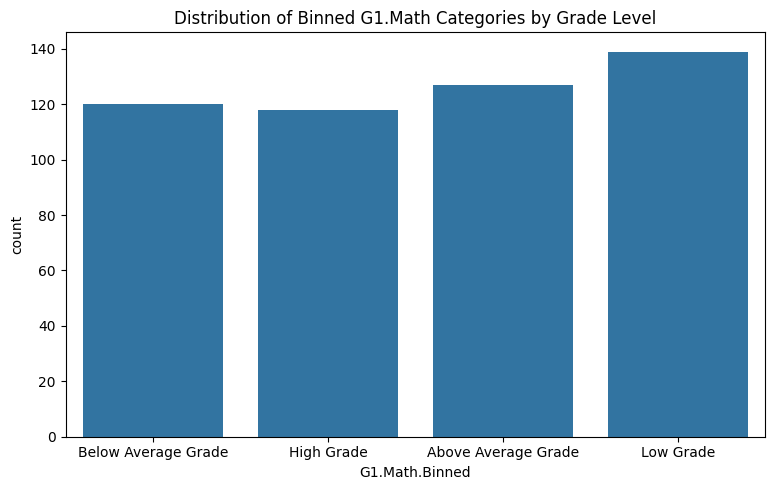

In [6]:
data_task2_updated = data_task2 .copy()
data_task2_updated['G1.Math.Binned'] = data_task2_updated['G1.Math.Binned'].map({
    0: 'Low Grade',
    1: 'Below Average Grade',
    2: 'Above Average Grade',
    3: 'High Grade'
})

# Plotting
plt.figure(figsize=(15, 5))


# Bar plot for G1.Math Binned categories
plt.subplot(1, 2, 2)
sns.countplot(x='G1.Math.Binned', data=data_task2_updated)
plt.title('Distribution of Binned G1.Math Categories by Grade Level')

plt.tight_layout()
plt.show()

This plot illustrates the distribution of students across these four grade categories, offering a clear view of how the students' grades in G1.Math are distributed.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Encoding categorical variables
data_task2['schoolsup'] = data_task2['schoolsup'].map({'yes': 1, 'no': 0})
data_task2['famsup'] = data_task2['famsup'].map({'yes': 1, 'no': 0})

# Splitting the data
X_task2 = data_task2.drop(['G1.Math', 'G1.Math.Binned'], axis=1)
y_task2 = data_task2['G1.Math.Binned']
X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(X_task2, y_task2, test_size=0.2, random_state=0)


C:\Users\hahir\AppData\Local\Temp\ipykernel_28336\1737420868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task2['schoolsup'] = data_task2['schoolsup'].map({'yes': 1, 'no': 0})
C:\Users\hahir\AppData\Local\Temp\ipykernel_28336\1737420868.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task2['famsup'] = data_task2['famsup'].map({'yes': 1, 'no': 0})


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Selecting the relevant features for Task 2 as per the user's code
features_task2 = ['goout', 'schoolsup', 'famsup', 'Dalc', 'G1.Math']
data_task2 = df[features_task2]

# Binning the 'G1.Math' into 4 categories
data_task2['G1.Math.Binned'] = pd.qcut(data_task2['G1.Math'], 4, labels=False)

# Encoding categorical variables
data_task2['schoolsup'] = data_task2['schoolsup'].map({'yes': 1, 'no': 0})
data_task2['famsup'] = data_task2['famsup'].map({'yes': 1, 'no': 0})

# Splitting the data
X_task2 = data_task2.drop(['G1.Math', 'G1.Math.Binned'], axis=1)
y_task2 = data_task2['G1.Math.Binned']

# Splitting the dataset into training and testing sets

X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(X_task2, y_task2, test_size=0.2, random_state=0)

# Initializing models
log_reg = LogisticRegression(random_state=0)
rf_classifier = RandomForestClassifier(random_state=0)
svm_classifier = SVC(random_state=0)

# Training models
log_reg.fit(X_train_task2, y_train_task2)
rf_classifier.fit(X_train_task2, y_train_task2)
svm_classifier.fit(X_train_task2, y_train_task2)

# Making predictions
log_reg_pred = log_reg.predict(X_test_task2)
rf_pred = rf_classifier.predict(X_test_task2)
svm_pred = svm_classifier.predict(X_test_task2)

# Evaluating models
models = ['Logistic Regression', 'Random Forest', 'SVM']
predictions = [log_reg_pred, rf_pred, svm_pred]

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model, prediction in zip(models, predictions):
    accuracy = accuracy_score(y_test_task2, prediction)
    precision = precision_score(y_test_task2, prediction, average='macro')
    recall = recall_score(y_test_task2, prediction, average='macro')
    f1 = f1_score(y_test_task2, prediction, average='macro')
    model_performance.loc[model] = [accuracy, precision, recall, f1]

model_performance


C:\Users\hahir\AppData\Local\Temp\ipykernel_28336\2209000039.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task2['G1.Math.Binned'] = pd.qcut(data_task2['G1.Math'], 4, labels=False)
C:\Users\hahir\AppData\Local\Temp\ipykernel_28336\2209000039.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_task2['schoolsup'] = data_task2['schoolsup'].map({'yes': 1, 'no': 0})
C:\Users\hahir\AppData\Local\Temp\ipykernel_28336\2209000039.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.326733,0.267207,0.315273,0.281219
Random Forest,0.326733,0.349014,0.336473,0.324284
SVM,0.326733,0.335470,0.330524,0.325042


The models perform equally looking at the accuracy but for Precision, Recall and F1 Score the Random Forest model performed the best. Overall the models show moderate predictive ability, indicating that goout, schoolsup, famsup, and Dalc have some influence on the binned G1.Math grades but might not capture the entire complexity.

### Feature Importance Plot Analysis

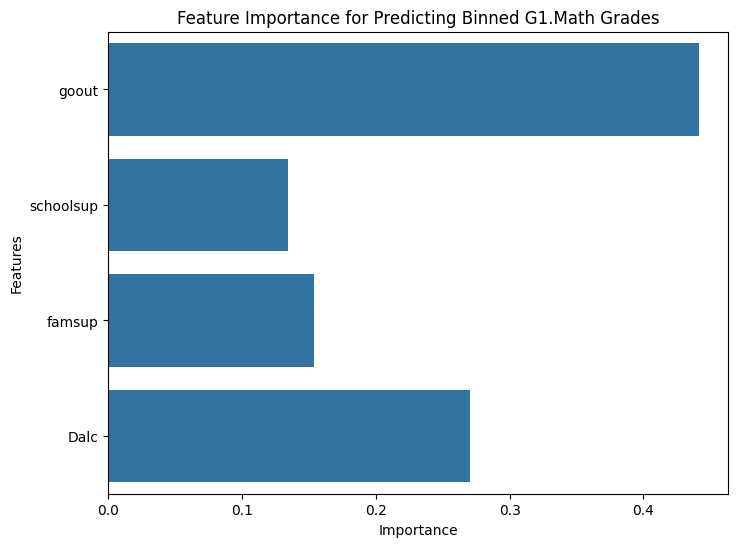

In [9]:
# Feature Importance Plot
feature_importances = rf_classifier.feature_importances_
features = X_train_task2.columns

# Plotting the Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance for Predicting Binned G1.Math Grades')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


The bar plot above shows the importance of each selected feature in predicing the G1.Math target using random forest model
goout (Going out with friends) and Dalc (Workday alcohol consumption) are  the most influential features. This could suggests that social activities and alcohol consumption have a significant impact on students  grades.
schoolsup (Extra educational support) and famsup (Family educational support) seem to have less influence compared to goout and Dalc. However, their impact is still non-negligible.
This insight shows that students' social behaviors and lifestyle choices might play a more critical role in their academic performance. 

### Confusion Matrix Analysis:


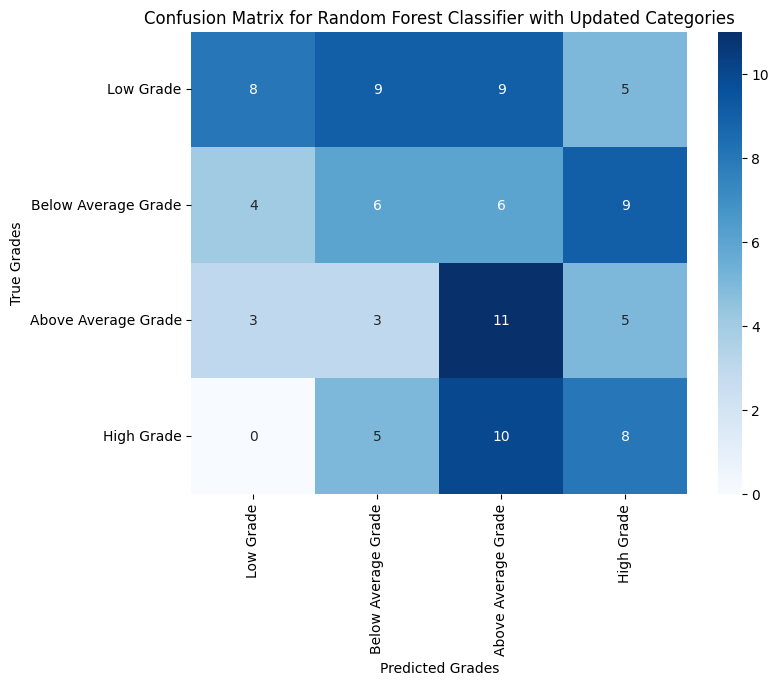

In [10]:
from sklearn.metrics import confusion_matrix

# Renaming the categories for better comprehension
new_category_names = ['Low Grade', 'Below Average Grade', 'Above Average Grade', 'High Grade']

# Creating a confusion matrix with the updated category names
cm = confusion_matrix(y_test_task2, rf_pred)

# Plotting the updated confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=new_category_names, yticklabels=new_category_names)
plt.title('Confusion Matrix for Random Forest Classifier with Updated Categories')
plt.xlabel('Predicted Grades')
plt.ylabel('True Grades')
plt.show()


Diagonal Cells: Show correct predictions. The model performs moderately in correctly identifying each grade category, with varying degrees of accuracy across categories.
Off-Diagonal Cells: Indicate misclassifications. There are notable instances where the model confuses one category with another, particularly between adjacent categories.

In [11]:
from sklearn.metrics import classification_report


# Generating classification report
class_report = classification_report(y_test_task2, rf_pred, target_names=new_category_names)

print(class_report)


                     precision    recall  f1-score   support

          Low Grade       0.53      0.26      0.35        31
Below Average Grade       0.26      0.24      0.25        25
Above Average Grade       0.31      0.50      0.38        22
         High Grade       0.30      0.35      0.32        23

           accuracy                           0.33       101
          macro avg       0.35      0.34      0.32       101
       weighted avg       0.36      0.33      0.32       101



Low Grade: Precision of 0.53 and recall of 0.26. This suggests the model is relatively accurate when it predicts low grades, but it tends to miss a significant number of actual low-grade cases.
Below Average Grade: Precision of 0.26 and recall of 0.24. Indicates the model struggles both in accurately predicting and in identifying all cases of below-average grades.
Above Average Grade: Precision of 0.31 and recall of 0.50. Shows the model is better at identifying cases of above-average grades, although with moderate accuracy.
High Grade: Precision of 0.30 and recall of 0.35. Implies the model is moderately effective in predicting and identifying high grades.

### Hyperparameter Tuning

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Feature Engineering: Adding Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_task2)
X_poly_test = poly.transform(X_test_task2)

# Training a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=0)
gb_classifier.fit(X_poly_train, y_train_task2)

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                              param_grid=param_grid_rf,
                              cv=3,
                              n_jobs=-1,
                              verbose=2)
grid_search_rf.fit(X_poly_train, y_train_task2)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Predictions with Gradient Boosting and Tuned Random Forest
gb_pred = gb_classifier.predict(X_poly_test)
rf_tuned_pred = grid_search_rf.best_estimator_.predict(X_poly_test)

# Evaluation
gb_accuracy = accuracy_score(y_test_task2, gb_pred)
rf_tuned_accuracy = accuracy_score(y_test_task2, rf_tuned_pred)

best_params_rf, gb_accuracy, rf_tuned_accuracy


Fitting 3 folds for each of 24 candidates, totalling 72 fits


({'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.3564356435643564,
 0.31683168316831684)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest Classifier with the optimized parameters
optimized_rf = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Maximum depth of trees
    min_samples_split=2,   # Minimum number of samples required to split a node
    min_samples_leaf=2,    # Minimum number of samples required at a leaf node
    random_state=0         # For reproducibility
)

# Training the model on the training data
optimized_rf.fit(X_train_task2, y_train_task2)

# Evaluate the model
predictions = optimized_rf.predict(X_test_task2)

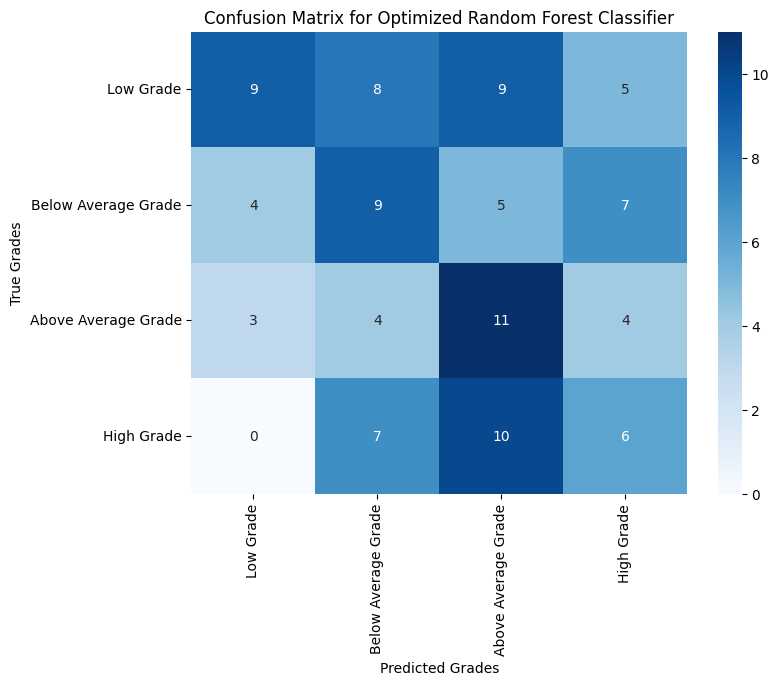

In [14]:
# Using the optimized Random Forest model for predictions
optimized_rf_predictions = optimized_rf.predict(X_test_task2)


# Creating a confusion matrix for the optimized Random Forest model
optimized_rf_cm = confusion_matrix(y_test_task2, optimized_rf_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(optimized_rf_cm, annot=True, fmt='g', cmap='Blues', xticklabels=new_category_names, yticklabels=new_category_names)
plt.title('Confusion Matrix for Optimized Random Forest Classifier')
plt.xlabel('Predicted Grades')
plt.ylabel('True Grades')
plt.show()

The confusion matrix shows moderate effectiveness in correct predictions (diagonal values) but also highlights notable misclassifications between adjacent categories.
Based on that it can be seen that the optimized model provides some improvement. However Further refinements, additional relevant features, or trying different modeling approaches could potentially enhance the model's performance.

In [15]:
from sklearn.metrics import classification_report

# Renaming the categories for the classification report
new_category_names = ['Low Grade', 'Below Average Grade', 'Above Average Grade', 'High Grade']

# Generating classification report
optimized_rf_class_report = classification_report(y_test_task2, optimized_rf_predictions, target_names=new_category_names)

print(optimized_rf_class_report)

                     precision    recall  f1-score   support

          Low Grade       0.56      0.29      0.38        31
Below Average Grade       0.32      0.36      0.34        25
Above Average Grade       0.31      0.50      0.39        22
         High Grade       0.27      0.26      0.27        23

           accuracy                           0.35       101
          macro avg       0.37      0.35      0.34       101
       weighted avg       0.38      0.35      0.35       101



The model shows the highest precision for predicting "Low Grade" but has a lower recall.
"Above Average Grade" has the highest recall, meaning that the model is relatively better at identifying students in this grade category.
The overall accuracy has slightly improved to 0.35 after using hyperparameters tuning.

Based on the analyses and results obtained from the models and visualizations, we can conclude several insights about the features used to predict `G1.Math` grades (`goout`, `schoolsup`, `famsup`, `Dalc`):

1. **Influence of Social Behavior**:
   - **`goout` (Going out with friends)** and **`Dalc` (Workday alcohol consumption)** seems to be the most influential features in the Random Forest model when looking at the feature importance plot in Random Forest. This could translate that social behaviors and lifestyle choices have a significant impact on students Math grades. 
   - Higher social activity and alcohol consumption might be associated with variations in academic performance, possibly due to the impact on study time, focus, or overall well-being.

2. **Support Systems**:
   - **`schoolsup` (Extra educational support)** and **`famsup` (Family educational support)** showed less influence compared to `goout` and `Dalc`. This shows that while support systems are important, they might not be as strong predictors of `G1.Math` grades as the social behavior factors.
   - This could imply that the effectiveness of educational and family support might depend on other intervening factors like the student's personal circumstances, learning preferences, or the quality of the support received.

3. **Model Performance and Complexity**:
   - The overall performance of the models (accuracy around 35% for the best model) suggests that these features, while relevant, do not capture the entire complexity of factors influencing academic performance in Math.
   - Academic performance is multifaceted, therefore influenced by a combination of personal, social, and other factors

4. **Implications for Intervention**:
   - The findings highlight the potential impact of social habits on academic performance, which can be important for educators to know why their students are failing.
   - Interventions aimed at helping the students to balance the  social life with academic responsibilities. Also, understanding the role and effectiveness of support systems can help in designing better educational support strategies.

5. **Need for Further Analysis**:
   - Additional features, possibly including psychological factors, learning habits, teacher-student interactions, and more detailed lifestyle information, could provide a more comprehensive understanding.
   - Further research and more sophisticated modeling techniques might produce better insights to determine the academic success in Math for the students.

In summary, while the selected features provide some insights into factors affecting `G1.Math` grades, they represent just a portion of the inlfuence on academic performance. A more deeper approach, considering a wider range of variables, might be necessary for a better understanding.